In [34]:
import os,sys
os.environ["JAX_ENABLE_X64"] = "True"
from dadapy import Hamming
from dadapy._utils.stochastic_minimization_hamming import BID
from time import time 
import numpy as np
from datetime import datetime
from jax import numpy as jnp
_datetime = datetime.today().strftime('%Y-%m-%d %H:%M:%S')
print(_datetime)

eps = 1E-7
### PARAMETERS
LLM = 'Pythia'
corpus = 'Wikitext'
l_id = 24

alphamax = .7
alphamin = 1E-5

if l_id == 24 and LLM == 'OPT':
  emb_dim = 512
else:
  emb_dim = 1024

task_id = 30
sub_length = 10*task_id

histfolder = f'../results/{corpus}/{LLM}/hist/'

H = Hamming()
H.D_histogram(k=sub_length,
              t=l_id,
              resultsfolder=histfolder)
B = BID(H,
        alphamin=alphamin,
        alphamax=alphamax,
        L=emb_dim*sub_length,
        )

B.set_idmin()
B.set_idmax()
B.truncate_hist()
B.set_filepaths()

Nsteps = int(5E2)
# delta = jnp.double([500.,2/1000.])
delta = jnp.double([1/10.,1/10.]) / 5

params = {
  'L':B.L,
  'remp':B.remp,
  'Pemp':B.Pemp,
  'Nsteps':Nsteps
}
vars = {
  'delta' : delta
}

2024-11-06 15:16:30


opt.vars["logKL"]=Array(-7.07, dtype=float64)


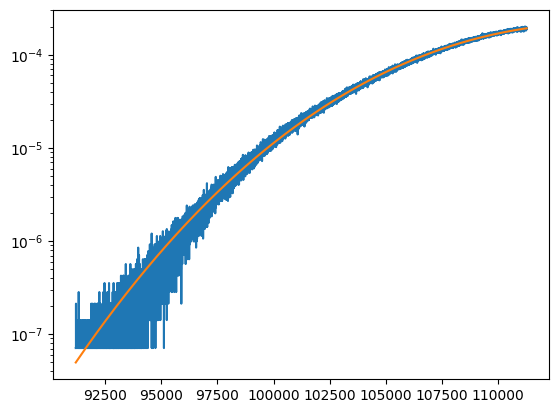

In [32]:
sys.path.append(f'../../../../')
from BID_Optimizer.BID_optimizer import *
import matplotlib.pyplot as plt 


opt = Optimizer(params,vars)
opt = opt.create(params,vars)
opt.params
opt = set_initial_condition(opt)

opt = minimize_loss(opt)
print(f'{opt.vars["logKL"]=}')

plt.plot(B.remp,B.Pemp)
plt.plot(opt.params['remp'],opt.vars['Pmodel'])
plt.yscale('log')

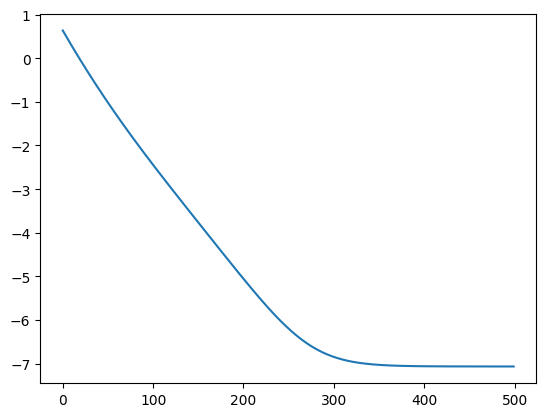

In [33]:
plt.plot(opt.vars['logKLs'])